In [1]:
!pip -q install cdsapi xarray h5netcdf netcdf4 pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.0 MB/s eta 0:00:00


Installs the Python libraries Colab needs to talk to ADS and read NetCDF/GRIB files.

In [2]:
import os

os.environ["CDSAPI_URL"] = "https://ads.atmosphere.copernicus.eu/api"
os.environ["CDSAPI_KEY"] = "24cbeac3-40dc-49e3-8e43-d3d6ba3b8a2d"   # <-- put your key

print("CDSAPI_URL:", os.environ["CDSAPI_URL"])
print("CDSAPI_KEY set:", "YES" if os.environ.get("CDSAPI_KEY") else "NO")


CDSAPI_URL: https://ads.atmosphere.copernicus.eu/api
CDSAPI_KEY set: YES


Stores your ADS API URL and API key as environment variables.

In [3]:
import cdsapi
import os

dataset = "cams-gridded-solar-radiation"
request = {
    "variable": [
        "global_horizontal_irradiation",
        "direct_horizontal_irradiation",
        "diffuse_horizontal_irradiation",
        "direct_normal_irradiation"
    ],
    "sky_type": ["clear"],
    "version": ["4.6"],
    "year": ["2010"],
    "month": ["07"],
    "area": [46.32, 5.95, 46.13, 6.3]  # North, West, South, East
}

client = cdsapi.Client()  # uses env vars
cams_file = "cams_2010_07.nc"

try:
    client.retrieve(dataset, request).download(cams_file)
    print("✅ Download attempted for:", cams_file)
    if os.path.exists(cams_file):
        print(f"✅ File '{cams_file}' found on disk after download.")
    else:
        print(f"❌ File '{cams_file}' NOT found on disk after download.")
except Exception as e:
    print(f"❌ Error during download: {e}")

print("Current directory contents:", os.listdir('.'))

2026-01-22 20:50:32,164 INFO Request ID is 1837cf6b-95b3-41d8-b1d3-153f200984e8
INFO:ecmwf.datastores.legacy_client:Request ID is 1837cf6b-95b3-41d8-b1d3-153f200984e8
2026-01-22 20:50:32,353 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2026-01-22 20:50:46,539 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2026-01-22 20:50:54,317 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


ae804d84c5bfb994b5df4c052ad5f432.zip:   0%|          | 0.00/995k [00:00<?, ?B/s]

✅ Download attempted for: cams_2010_07.nc
✅ File 'cams_2010_07.nc' found on disk after download.
Current directory contents: ['.config', 'cams_2010_07.nc', 'sample_data']


Imports libraries (xarray, pandas, numpy…)

Defines your bounding box:

AREA = [North, West, South, East] = [45.25, -0.25, 44.75, 0.25]

In [4]:
import os, pathlib

f = "cams_2010_07.nc"
print("Exists:", os.path.exists(f))
print("Size (bytes):", os.path.getsize(f) if os.path.exists(f) else None)

# Print first 200 bytes to see if it's NetCDF or HTML/text
with open(f, "rb") as fh:
    head = fh.read(200)

print("First 200 bytes:")
print(head)


Exists: True
Size (bytes): 1018395
First 200 bytes:
b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xa7\x936\\.X\xc7\x9b\xcc\xdd\x03\x00\xa4\xdd\x03\x00:\x00\x00\x00v4.6_BHI_clear_2010_07.area-subset.46.32.6.3.46.13.5.95.nc\x00\x00\x80\xff\x7f\x89HDF\r\n\x1a\n\x02\x08\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xa4\xdd\x03\x00\x00\x00\x00\x000\x00\x00\x00\x00\x00\x00\x00\xbek\xdahOHDR\x02\r!\x02\x02"\x00\x00\x00\x00\x00\x03\x07\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\n\x02\x00\x01\x00\x00\x00\x00\x15\x1c\x00'


Sends your request to ADS and downloads a file like:
cams_2010_07.nc

Why: This is the dataset containing:

GHI (global)

BHI (direct horizontal)

DHI (diffuse)

BNI (direct normal / DNI)

What you should see: “Downloaded: cams_2010_07.nc”

In [5]:
import os
import cdsapi

# Remove bad file if it exists
bad = "cams_2010_07.nc"
if os.path.exists(bad):
    os.remove(bad)
    print("Deleted corrupted file:", bad)

dataset = "cams-gridded-solar-radiation"
request = {
    "variable": [
        "global_horizontal_irradiation",
        "direct_horizontal_irradiation",
        "diffuse_horizontal_irradiation",
        "direct_normal_irradiation"
    ],
    "sky_type": ["clear"],
    "version": ["4.6"],
    "year": ["2010"],
    "month": ["07"],
    "area": [46.32, 5.95, 46.13, 6.3]  # N,W,S,E
}

client = cdsapi.Client()  # uses your CDSAPI_URL and CDSAPI_KEY env vars
result = client.retrieve(dataset, request)

# Download to a temp name first, then rename (safer)
tmp_name = "download_tmp.nc"
result.download(tmp_name)

os.rename(tmp_name, bad)
print("✅ Re-downloaded:", bad, "size:", os.path.getsize(bad))


Deleted corrupted file: cams_2010_07.nc


2026-01-22 20:51:03,322 INFO Request ID is 52e242e3-4229-44ea-b6a1-c630b3af8eea
INFO:ecmwf.datastores.legacy_client:Request ID is 52e242e3-4229-44ea-b6a1-c630b3af8eea
2026-01-22 20:51:03,499 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2026-01-22 20:51:25,763 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


ae804d84c5bfb994b5df4c052ad5f432.zip:   0%|          | 0.00/995k [00:00<?, ?B/s]

✅ Re-downloaded: cams_2010_07.nc size: 1018395


CAMS files often look like “.nc” but are stored in NetCDF4/HDF5 format. h5netcdf is the engine that can reliably read them in Colab.

What you should see:

a printed dataset summary

a list of variables (data_vars)

dimensions (dims)

In [6]:
import xarray as xr
import zipfile
import os

f = "cams_2010_07.nc" # This is the downloaded ZIP file

# Check if it's a zip file and extract
if zipfile.is_zipfile(f):
    print(f"Detected {f} is a ZIP file. Extracting...")
    with zipfile.ZipFile(f, 'r') as zip_ref:
        # Get list of files in the zip
        namelist = zip_ref.namelist()
        if any(name.endswith('.nc') for name in namelist):
            nc_files = [name for name in namelist if name.endswith('.nc')]
            extracted_file = nc_files[0] # Assuming there's at least one .nc file
            zip_ref.extractall('.') # Extract all contents to current directory
            print(f"✅ Extracted '{extracted_file}' from '{f}'")
            f = extracted_file # Update 'f' to point to the extracted NetCDF file
        else:
            print(f"❌ No .nc files found inside the zip {f}.")
            raise ValueError("No NetCDF file found inside the downloaded ZIP archive.")
else:
    print(f"'{f}' does not appear to be a ZIP file. Attempting to open directly.")


# Try h5netcdf first (most common for CAMS)
try:
    ds = xr.open_dataset(f, engine="h5netcdf")
    print("✅ Opened with h5netcdf")
except Exception as e1:
    print("h5netcdf failed:", repr(e1))
    print("Trying netcdf4...")
    try:
        ds = xr.open_dataset(f, engine="netcdf4")
        print("✅ Opened with netcdf4")
    except Exception as e2:
        print("netcdf4 failed:", repr(e2))
        raise # re-raise the error if both fail

print(ds)
print("Variables:", list(ds.data_vars))
print("Dims:", ds.dims)

Detected cams_2010_07.nc is a ZIP file. Extracting...
✅ Extracted 'v4.6_BHI_clear_2010_07.area-subset.46.32.6.3.46.13.5.95.nc' from 'cams_2010_07.nc'
✅ Opened with h5netcdf
<xarray.Dataset> Size: 214kB
Dimensions:                                (time: 2976, latitude: 2,
                                            longitude: 4)
Coordinates:
  * time                                   (time) datetime64[ns] 24kB 2010-07...
  * latitude                               (latitude) float32 8B 46.25 46.15
  * longitude                              (longitude) float32 16B 5.95 ... 6.25
Data variables:
    beam_horizontal_clear_sky_irradiation  (time, latitude, longitude) float64 190kB ...
Attributes:
    Conventions:    CF-1.6
    title:          Volume of CAMS Radiation Service data over MSG-0 deg fiel...
    institution:    Vaisala, Mines Paris and DLR
    source:         CAMS McClear 3.6
    contact:        soda@vaisala.com
    creation_date:  2024-06-07 22:59:22.031945
    frequency:      15 m

Extracts each variable into a dataframe:

GHI, BHI, DHI, BNI

Combines them into one table

Saves: output_data_irradiance.csv

Why: CSV is easier to work with and plot than xarray objects.

In [7]:
import pandas as pd
import xarray as xr
import os

# 'namelist' contains the list of extracted .nc files from the previous step (oG4TnTgK1o4W)
# It is available in the kernel state.

# Mapping to get the desired DataFrame column name from the filename suffix
# Note: CDS API variable names might differ slightly from the internal variable names.
# We will use the main identifier from the filename to map to the desired column name.
name_mapping = {
    '_GHI_': 'GHI',
    '_BHI_': 'BHI',
    '_DHI_': 'DHI',
    '_BNI_': 'BNI',
}

dataframes = []

for filename in namelist: # Use 'namelist' from the kernel state, which contains all extracted .nc files
    df_column_name = None
    for key_part, column_name in name_mapping.items():
        if key_part in filename: # Check for e.g., '_GHI_' in the filename
            df_column_name = column_name
            break

    if df_column_name is None:
        print(f"Skipping unknown file type or unmappable filename: {filename}")
        continue

    if os.path.exists(filename):
        try:
            # Open each file. Using h5netcdf first, then netcdf4 as fallback.
            ds_single = xr.open_dataset(filename, engine="h5netcdf")
            print(f"✅ Opened {filename} with h5netcdf")
        except Exception as e1:
            print(f"h5netcdf failed for {filename}: {repr(e1)}")
            print(f"Trying netcdf4 for {filename}...")
            try:
                ds_single = xr.open_dataset(filename, engine="netcdf4")
                print(f"✅ Opened {filename} with netcdf4")
            except Exception as e2:
                print(f"❌ Failed to open {filename} with h5netcdf or netcdf4: {repr(e2)}")
                continue # Skip this file if both engines fail

        if not ds_single.data_vars:
            print(f"❌ No data variables found in {filename}. Skipping.")
            continue

        # Get the actual (often single) variable name from the dataset
        var_name_in_ds = list(ds_single.data_vars.keys())[0]
        df_var = ds_single[var_name_in_ds].to_dataframe(name=df_column_name)
        dataframes.append(df_var)
    else:
        print(f"❌ File not found: {filename}. This indicates an issue with extraction or file path.")

if not dataframes:
    raise ValueError("No dataframes could be loaded. Please check the extracted files and their content.")

# Concatenate all dataframes. Assuming they have compatible coordinates/indices (time, latitude, longitude).
df_irr = pd.concat(dataframes, axis=1).reset_index()

out_csv = "output_data_irradiance.csv"
df_irr.to_csv(out_csv, index=False)

print("✅ Saved:", out_csv)
print(df_irr.head())

✅ Opened v4.6_BHI_clear_2010_07.area-subset.46.32.6.3.46.13.5.95.nc with h5netcdf
✅ Opened v4.6_BNI_clear_2010_07.area-subset.46.32.6.3.46.13.5.95.nc with h5netcdf
✅ Opened v4.6_DHI_clear_2010_07.area-subset.46.32.6.3.46.13.5.95.nc with h5netcdf
✅ Opened v4.6_GHI_clear_2010_07.area-subset.46.32.6.3.46.13.5.95.nc with h5netcdf
✅ Saved: output_data_irradiance.csv
                 time   latitude  longitude  BHI  BNI  DHI  GHI
0 2010-07-01 00:15:00  46.250000       5.95  0.0  0.0  0.0  0.0
1 2010-07-01 00:15:00  46.250000       6.05  0.0  0.0  0.0  0.0
2 2010-07-01 00:15:00  46.250000       6.15  0.0  0.0  0.0  0.0
3 2010-07-01 00:15:00  46.250000       6.25  0.0  0.0  0.0  0.0
4 2010-07-01 00:15:00  46.150002       5.95  0.0  0.0  0.0  0.0


Picks a single nearest grid point to your location (center of area)

Plots time-series lines for:

GHI

BNI (DNI)

DHI

Why: Your dataset is gridded. To plot a line over time, you must select one grid point

In [8]:
import pandas as pd

df = pd.read_csv("output_data_irradiance.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isna().sum())

df.head()


Shape: (23808, 7)
Columns: ['time', 'latitude', 'longitude', 'BHI', 'BNI', 'DHI', 'GHI']

Missing values per column:
 time         0
latitude     0
longitude    0
BHI          0
BNI          0
DHI          0
GHI          0
dtype: int64


,time,latitude,longitude,BHI,BNI,DHI,GHI
0,2010-07-01 00:15:00,46.25,5.95,0.0,0.0,0.0,0.0
1,2010-07-01 00:15:00,46.25,6.05,0.0,0.0,0.0,0.0
2,2010-07-01 00:15:00,46.25,6.15,0.0,0.0,0.0,0.0
3,2010-07-01 00:15:00,46.25,6.25,0.0,0.0,0.0,0.0
4,2010-07-01 00:15:00,46.15,5.95,0.0,0.0,0.0,0.0


Builds a lat/lon grid for one timestamp (or mean)

Plots a real geographic map (coastlines, borders)

Overlays your heat values on top using pcolormesh()

Draws:

the red rectangle (your bounding box)

the center point marker

Why: This gives you the “actual map background” with your heatmap correctly georeferenced.

What you should see: A map with colored squares + borders/coastlines.

Important: It can look “blocky” because your box is small and CAMS resolution is coarse.

In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv("output_data_irradiance.csv")

lat_col = "latitude" if "latitude" in df.columns else "lat"
lon_col = "longitude" if "longitude" in df.columns else "lon"
time_col = "time" if "time" in df.columns else None

# Center of your box: [45.25, -0.25, 44.75, 0.25]
center_lat = (45.25 + 44.75) / 2
center_lon = (-0.25 + 0.25) / 2

# Nearest grid point
df["dist2"] = (df[lat_col] - center_lat)**2 + (df[lon_col] - center_lon)**2
nearest_row = df.loc[df["dist2"].idxmin()]
nearest_lat = float(nearest_row[lat_col])
nearest_lon = float(nearest_row[lon_col])

print("✅ Nearest grid point:", nearest_lat, nearest_lon)

df_point = df[(df[lat_col] == nearest_lat) & (df[lon_col] == nearest_lon)].copy()
df_point = df_point.drop(columns=["dist2"], errors="ignore")

if time_col:
    df_point[time_col] = pd.to_datetime(df_point[time_col], errors="coerce")
    df_point = df_point.sort_values(time_col)

point_csv = "irradiance_point_timeseries.csv"
df_point.to_csv(point_csv, index=False)

print("✅ Saved:", point_csv)
df_point.head()


✅ Nearest grid point: 46.15 5.95
✅ Saved: irradiance_point_timeseries.csv


,time,latitude,longitude,BHI,BNI,DHI,GHI
4,2010-07-01 00:15:00,46.15,5.95,0.0,0.0,0.0,0.0
12,2010-07-01 00:30:00,46.15,5.95,0.0,0.0,0.0,0.0
20,2010-07-01 00:45:00,46.15,5.95,0.0,0.0,0.0,0.0
28,2010-07-01 01:00:00,46.15,5.95,0.0,0.0,0.0,0.0
36,2010-07-01 01:15:00,46.15,5.95,0.0,0.0,0.0,0.0


What it does:

Takes your real grid values

Uses interpolation (scipy.interpolate.griddata) to create a finer surface

Plots the smooth surface using contourf() on top of the map

Why: Your reference image looks smooth because it’s interpolated for visualization. This is standard for publication-style maps.

What you should see: A smooth gradient heatmap that looks like a real continuous weather map.

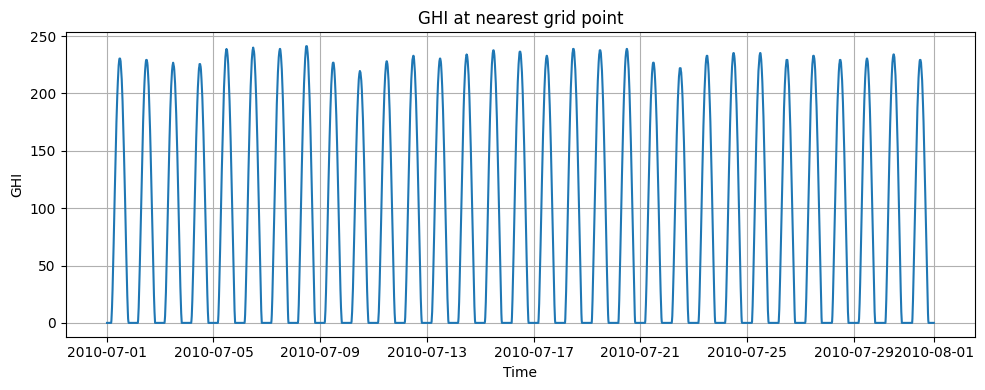

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_point = pd.read_csv("irradiance_point_timeseries.csv")

time_col = "time" if "time" in df_point.columns else None
if time_col:
    df_point[time_col] = pd.to_datetime(df_point[time_col], errors="coerce")

if time_col and "GHI" in df_point.columns:
    plt.figure(figsize=(10,4))
    plt.plot(df_point[time_col], df_point["GHI"])
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("GHI")
    plt.title("GHI at nearest grid point")
    plt.tight_layout()
    plt.show()
else:
    print("No time column or no GHI column found. Columns:", df_point.columns.tolist())


What this graph tells you scientifically
✔ Solar availability

Strong, consistent solar resource in July

Very predictable under clear-sky assumptions

✔ Data correctness

Zero at night ✔️

Smooth bell-shaped curves ✔️

No noise (clear sky) ✔️

This confirms:
👉 Your download, processing, and plotting are correct

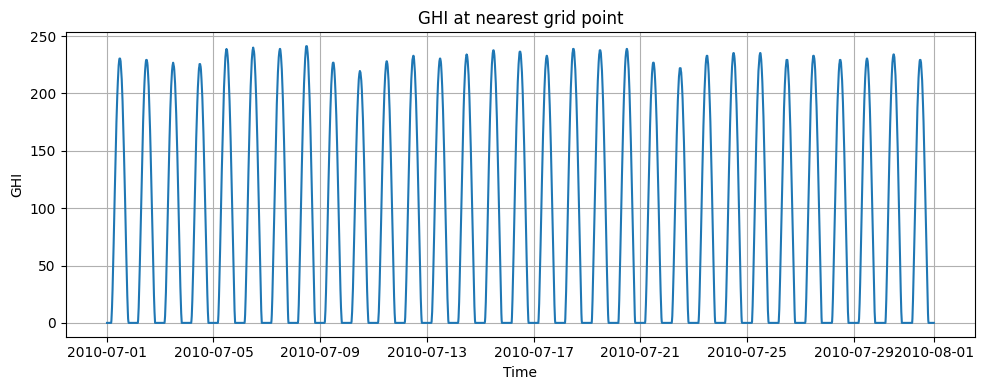

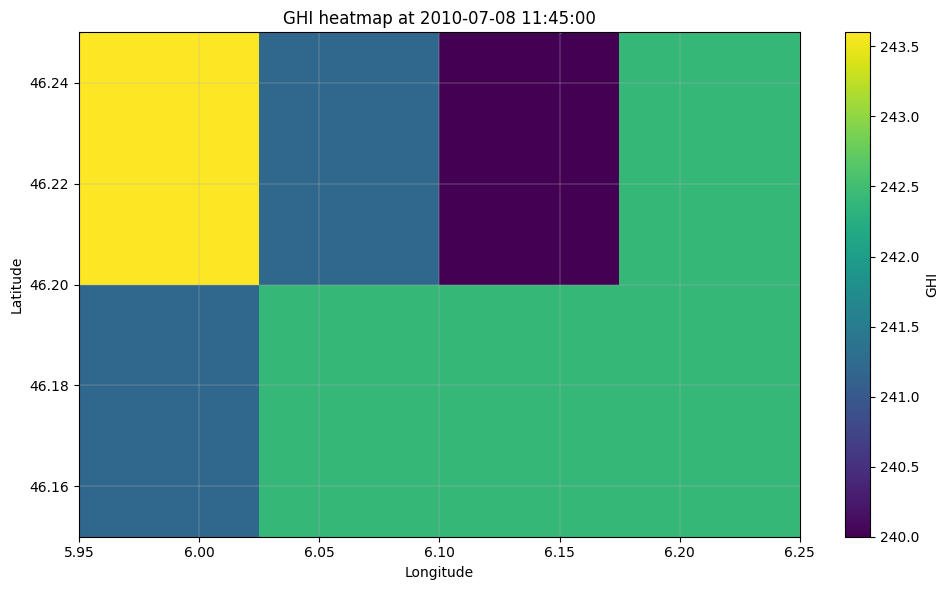

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("output_data_irradiance.csv")
df["time"] = pd.to_datetime(df["time"], errors="coerce")

var = "GHI"  # choose: "GHI", "DHI", "BNI", "BHI"

# pick the time with highest spatial mean (nice bright map)
best_time = df.groupby("time")[var].mean().idxmax()
d = df[df["time"] == best_time].copy()

# grid for imshow
grid = (
    d.pivot_table(index="latitude", columns="longitude", values=var, aggfunc="mean")
     .sort_index()
)

lats = grid.index.to_numpy()
lons = grid.columns.to_numpy()
Z = grid.to_numpy()

plt.figure(figsize=(10, 6))
im = plt.imshow(
    Z,
    origin="lower",
    extent=[float(lons.min()), float(lons.max()), float(lats.min()), float(lats.max())],
    aspect="auto"
)
plt.colorbar(im, label=var)
plt.scatter(d["longitude"], d["latitude"], s=1)  # show grid points
plt.title(f"{var} heatmap at {best_time}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()


GHI heatmap at 2010-07-08 11:45:00”

This is a map-style heatmap showing Global Horizontal Irradiance (GHI) over your selected area at a single timestamp.

In other words:

Your earlier line plot = how GHI changes with time at one point

This plot = how GHI varies in space at one moment.

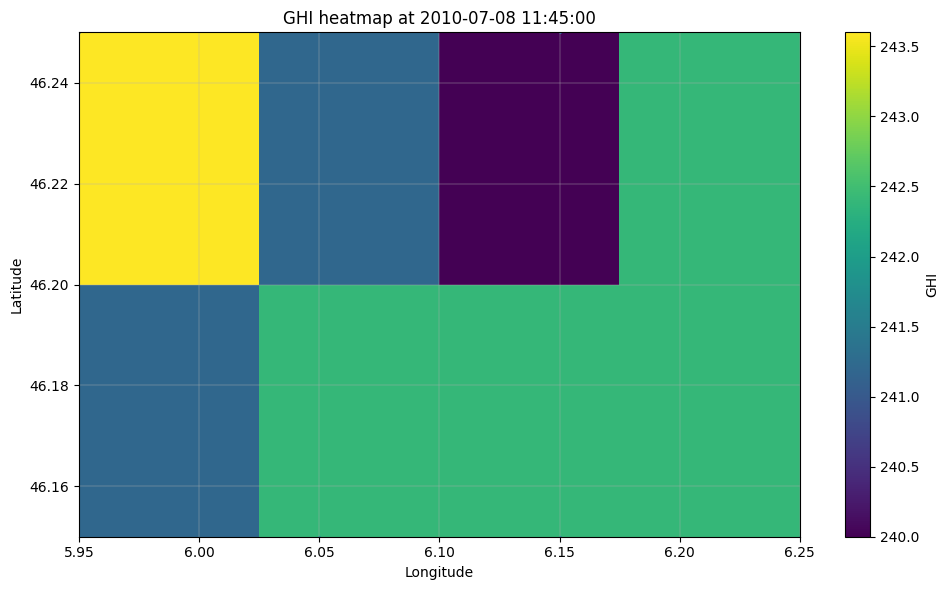

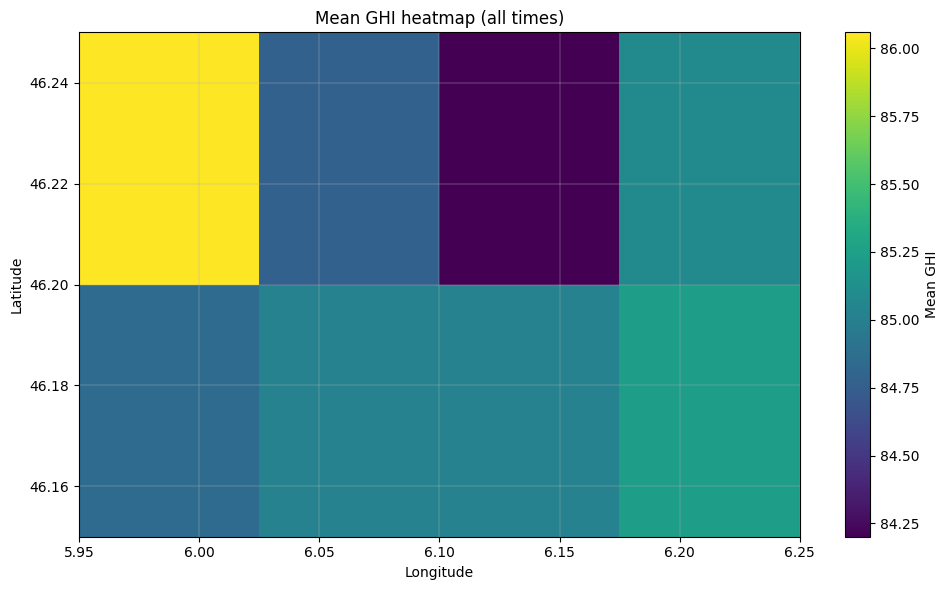

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("output_data_irradiance.csv")

var = "GHI"  # choose: "GHI", "DHI", "BNI", "BsHI"

mean_grid = (
    df.groupby(["latitude", "longitude"], as_index=False)[var].mean()
      .pivot_table(index="latitude", columns="longitude", values=var)
      .sort_index()
)

lats = mean_grid.index.to_numpy()
lons = mean_grid.columns.to_numpy()
Z = mean_grid.to_numpy()

plt.figure(figsize=(10, 6))
im = plt.imshow(
    Z,
    origin="lower",
    extent=[float(lons.min()), float(lons.max()), float(lats.min()), float(lats.max())],
    aspect="auto"
)
plt.colorbar(im, label=f"Mean {var}")
plt.title(f"Mean {var} heatmap (all times)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
df = pd.read_csv("output_data_irradiance.csv")
print("Unique lat:", df["latitude"].nunique())
print("Unique lon:", df["longitude"].nunique())
print("Lat range:", df["latitude"].min(), "to", df["latitude"].max())
print("Lon range:", df["longitude"].min(), "to", df["longitude"].max())


Unique lat: 2
Unique lon: 4
Lat range: 46.15 to 46.25
Lon range: 5.95 to 6.25


In [14]:
!pip -q install cartopy shapely pyproj


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 93.2 MB/s eta 0:00:00


In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("output_data_irradiance.csv")

# time
df["time"] = pd.to_datetime(df["time"], errors="coerce")

# columns (your CSV should have these)
lat_col = "latitude"
lon_col = "longitude"

vars_to_plot = ["GHI", "DHI", "BNI", "BHI"]
print("Columns:", df.columns.tolist())
print("Unique lats:", df[lat_col].nunique(), "Unique lons:", df[lon_col].nunique())
df.head()


Columns: ['time', 'latitude', 'longitude', 'BHI', 'BNI', 'DHI', 'GHI']
Unique lats: 2 Unique lons: 4


,time,latitude,longitude,BHI,BNI,DHI,GHI
0,2010-07-01 00:15:00,46.25,5.95,0.0,0.0,0.0,0.0
1,2010-07-01 00:15:00,46.25,6.05,0.0,0.0,0.0,0.0
2,2010-07-01 00:15:00,46.25,6.15,0.0,0.0,0.0,0.0
3,2010-07-01 00:15:00,46.25,6.25,0.0,0.0,0.0,0.0
4,2010-07-01 00:15:00,46.15,5.95,0.0,0.0,0.0,0.0


In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_heatmap_map(dframe, var, title):
    # pivot to grid (lat x lon)
    grid = (
        dframe.pivot_table(index="latitude", columns="longitude", values=var, aggfunc="mean")
              .sort_index()
    )

    lats = grid.index.to_numpy()
    lons = grid.columns.to_numpy()
    Z = grid.to_numpy()

    # edges for pcolormesh (so pixels align nicely)
    # If spacing is irregular, this still works reasonably for small boxes.
    lon2d, lat2d = np.meshgrid(lons, lats)

    fig = plt.figure(figsize=(7, 7))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set extent to your data area (with small padding)
    pad_lat = (lats.max() - lats.min()) * 0.15 if lats.max() > lats.min() else 0.2
    pad_lon = (lons.max() - lons.min()) * 0.15 if lons.max() > lons.min() else 0.2
    ax.set_extent([lons.min()-pad_lon, lons.max()+pad_lon, lats.min()-pad_lat, lats.max()+pad_lat], crs=ccrs.PlateCarree())

    # Map features (this gives the “country outline” feel)
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.BORDERS, linewidth=0.8)
    ax.add_feature(cfeature.LAND, alpha=0.15)
    ax.add_feature(cfeature.OCEAN, alpha=0.08)

    # gridlines like the example
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

    # Heatmap layer
    m = ax.pcolormesh(lon2d, lat2d, Z, shading="auto", transform=ccrs.PlateCarree())

    cb = plt.colorbar(m, ax=ax, orientation="vertical", shrink=0.8, pad=0.03)
    cb.set_label(var)

    ax.set_title(title)
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


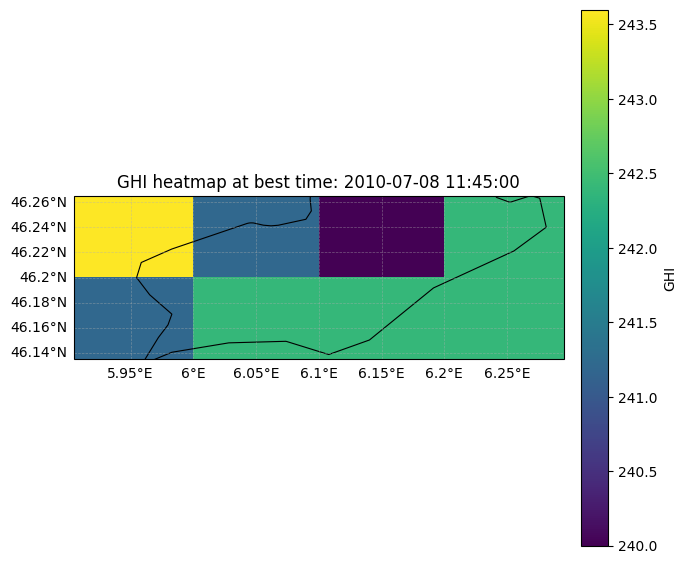

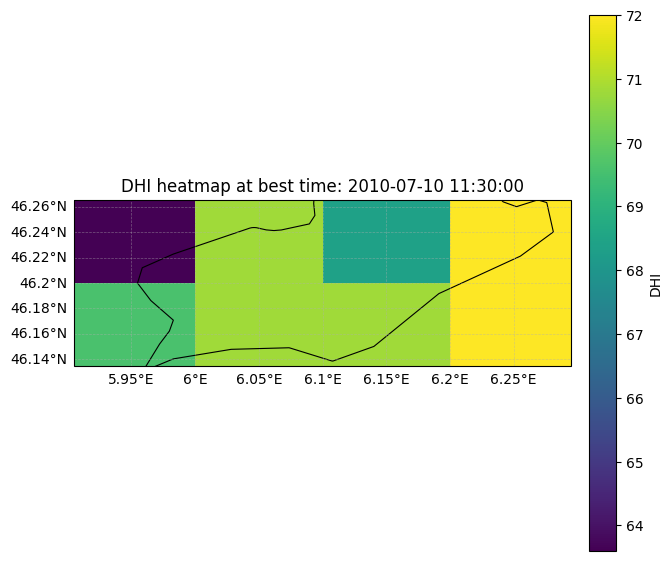

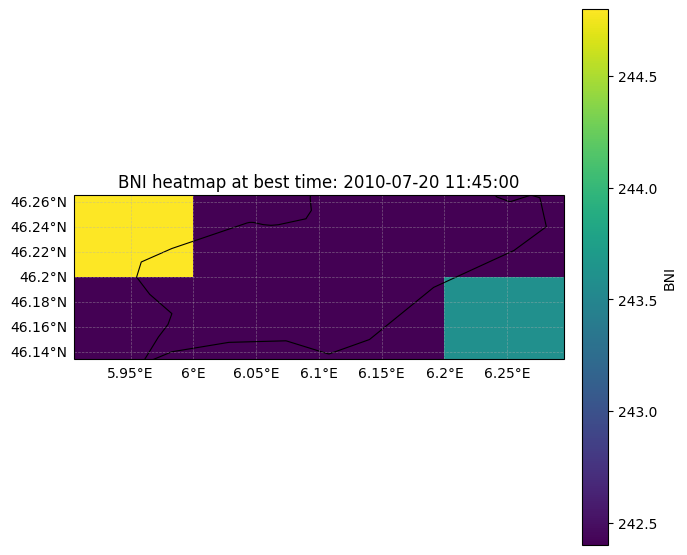

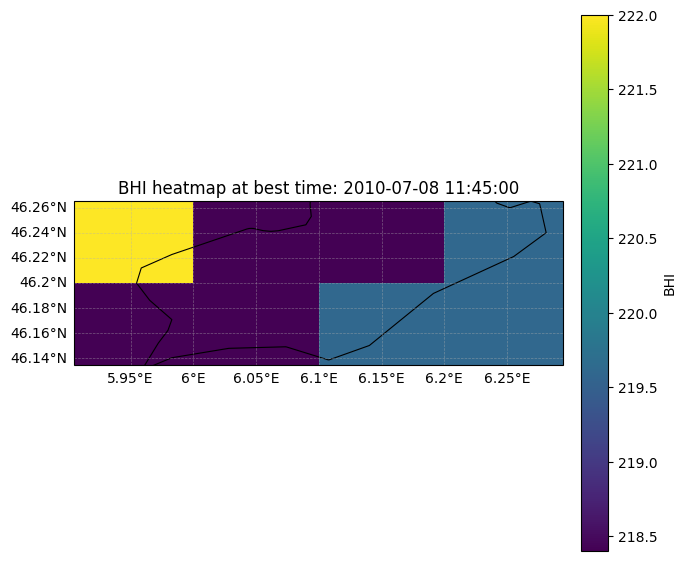

In [17]:
for var in ["GHI", "DHI", "BNI", "BHI"]:
    best_time = df.groupby("time")[var].mean().idxmax()
    d = df[df["time"] == best_time].copy()
    plot_heatmap_map(d, var, f"{var} heatmap at best time: {best_time}")


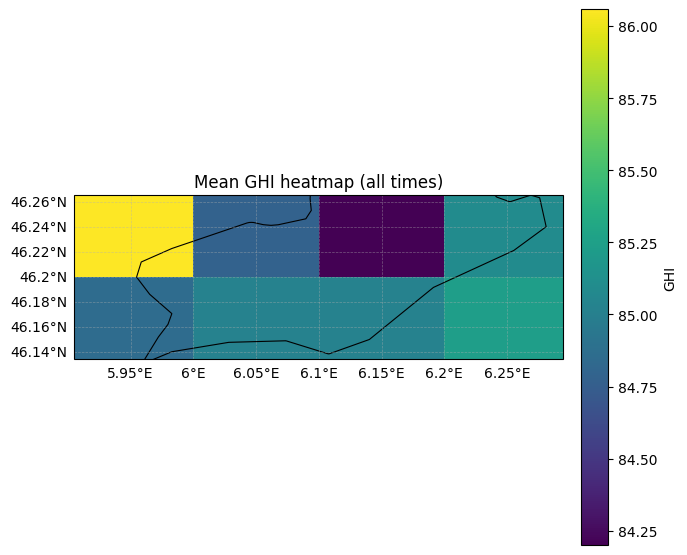

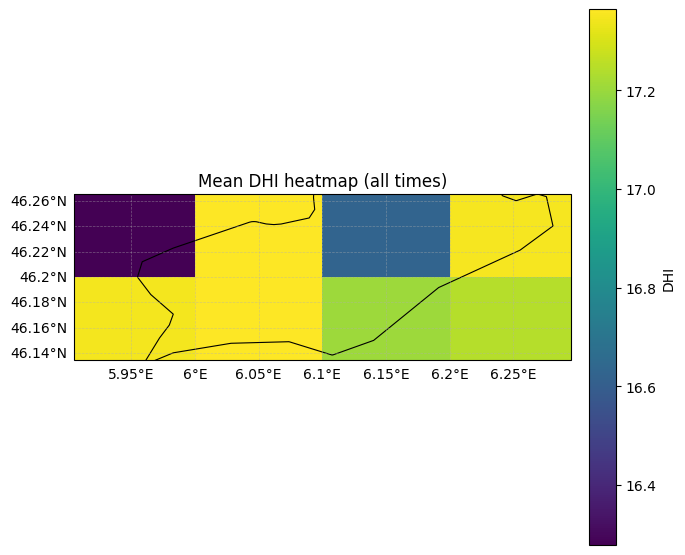

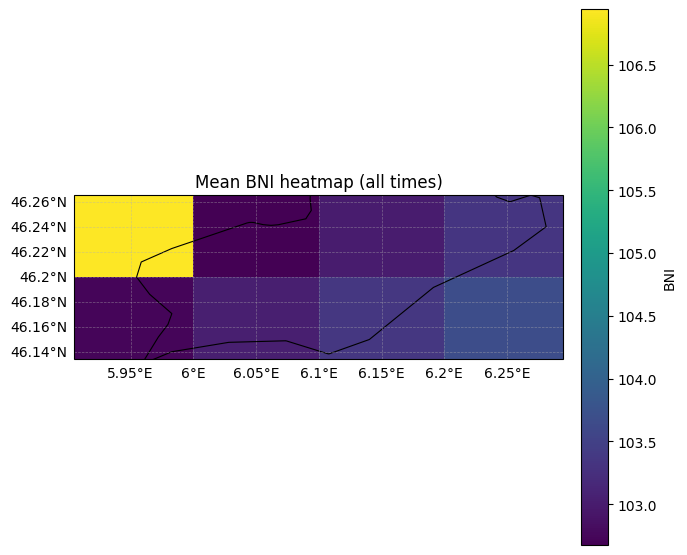

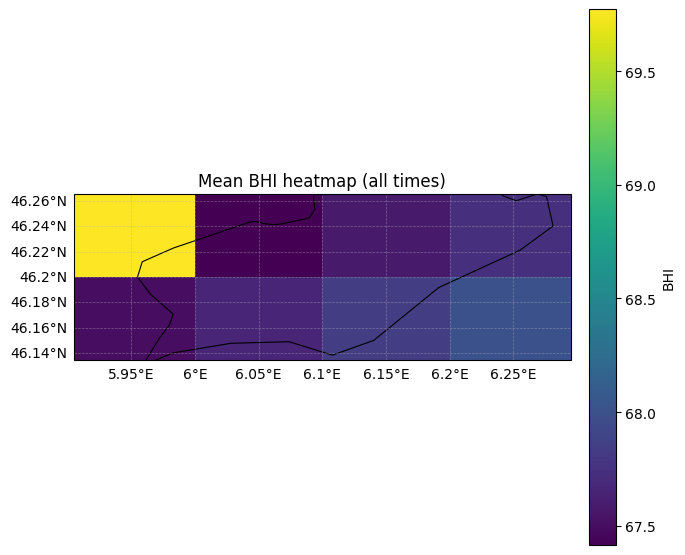

In [18]:
for var in ["GHI", "DHI", "BNI", "BHI"]:
    dmean = df.groupby(["latitude", "longitude"], as_index=False)[var].mean()
    plot_heatmap_map(dmean, var, f"Mean {var} heatmap (all times)")


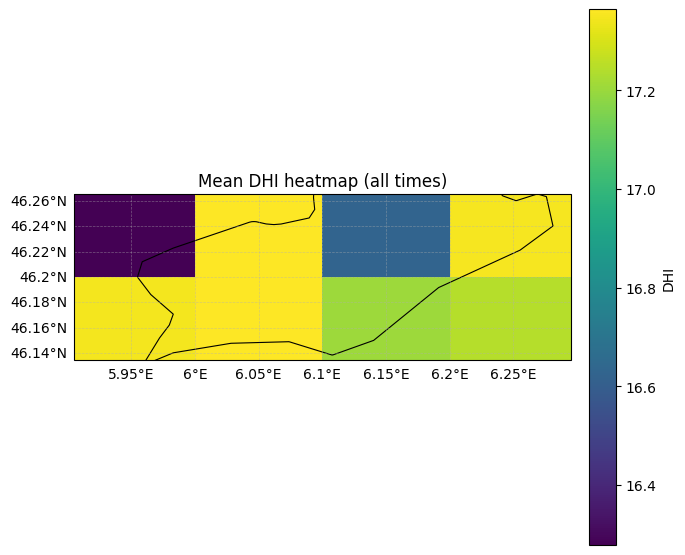


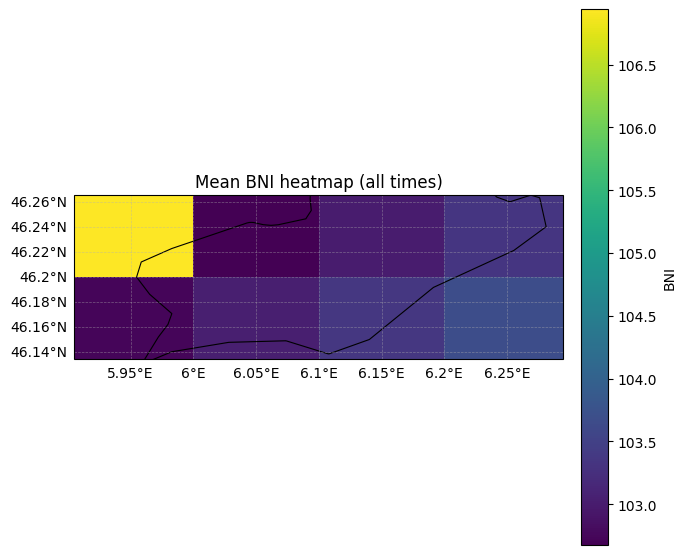

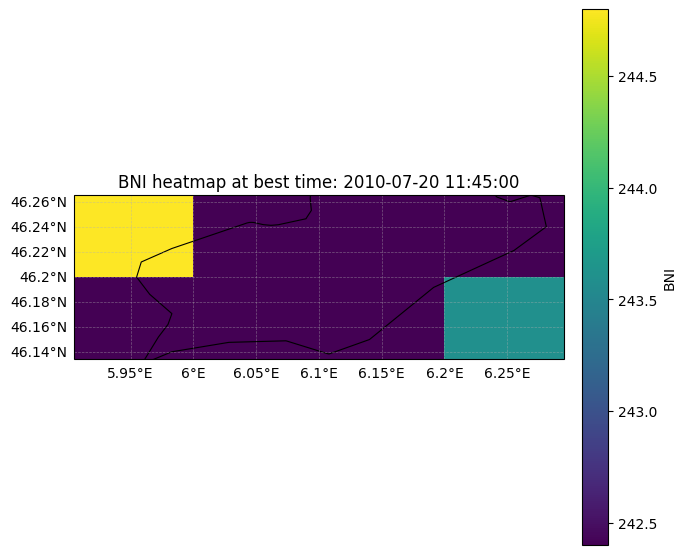





In [19]:
!pip -q install cartopy shapely pyproj pillow


In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("output_data_irradiance.csv")
df["time"] = pd.to_datetime(df["time"], errors="coerce")

print("Columns:", df.columns.tolist())
print("Times:", df["time"].min(), "->", df["time"].max(), "count:", df["time"].nunique())
df.head()


Columns: ['time', 'latitude', 'longitude', 'BHI', 'BNI', 'DHI', 'GHI']
Times: 2010-07-01 00:15:00 -> 2010-08-01 00:00:00 count: 2976


,time,latitude,longitude,BHI,BNI,DHI,GHI
0,2010-07-01 00:15:00,46.25,5.95,0.0,0.0,0.0,0.0
1,2010-07-01 00:15:00,46.25,6.05,0.0,0.0,0.0,0.0
2,2010-07-01 00:15:00,46.25,6.15,0.0,0.0,0.0,0.0
3,2010-07-01 00:15:00,46.25,6.25,0.0,0.0,0.0,0.0
4,2010-07-01 00:15:00,46.15,5.95,0.0,0.0,0.0,0.0


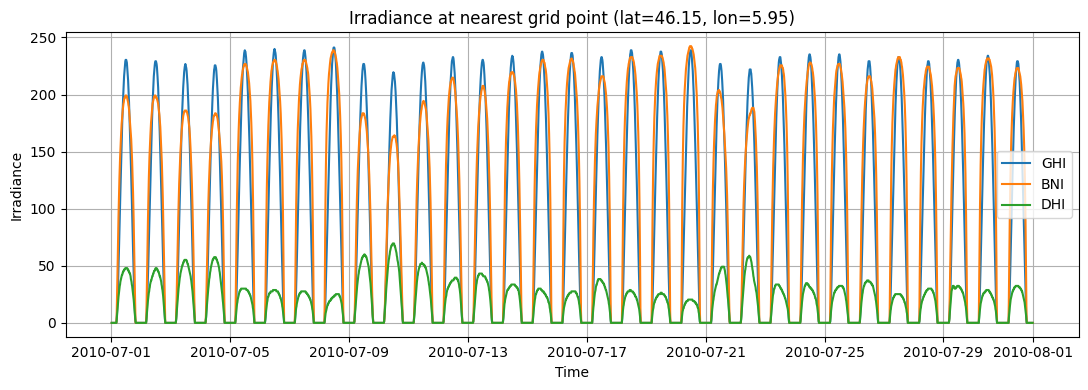

In [21]:
import matplotlib.pyplot as plt

lat_col, lon_col = "latitude", "longitude"

# center of your bounding box
center_lat = (45.25 + 44.75) / 2
center_lon = (-0.25 + 0.25) / 2

# nearest grid point
tmp = df.copy()
tmp["dist2"] = (tmp[lat_col] - center_lat)**2 + (tmp[lon_col] - center_lon)**2
row = tmp.loc[tmp["dist2"].idxmin()]
nearest_lat, nearest_lon = float(row[lat_col]), float(row[lon_col])

dpoint = df[(df[lat_col] == nearest_lat) & (df[lon_col] == nearest_lon)].copy()
dpoint = dpoint.sort_values("time")

# BNI is DNI (direct normal irradiation)
plt.figure(figsize=(11,4))
for v in ["GHI", "BNI", "DHI"]:
    if v in dpoint.columns:
        plt.plot(dpoint["time"], dpoint[v], label=v)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Irradiance")
plt.title(f"Irradiance at nearest grid point (lat={nearest_lat}, lon={nearest_lon})")
plt.legend()
plt.tight_layout()
plt.show()


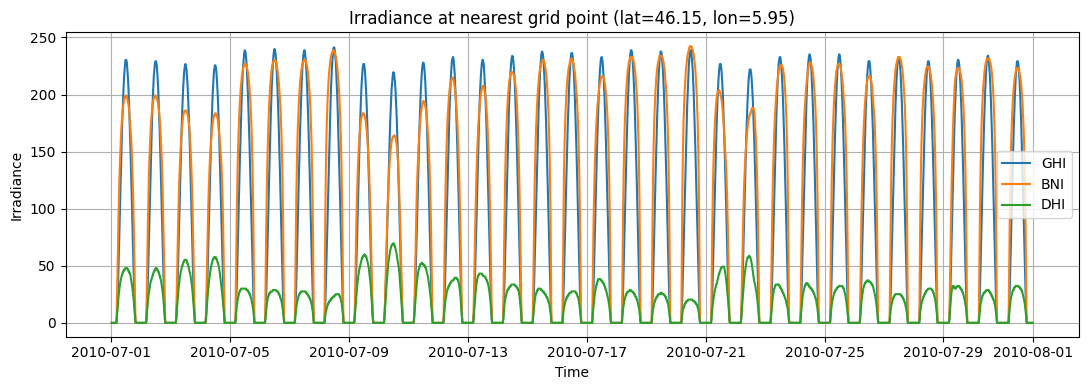

In [22]:
# Run this in a NEW cell in your Colab notebook

import json
import glob

# Find notebook files in /content
notebooks = glob.glob("/content/*.ipynb")

# Exclude checkpoint notebooks
notebooks = [n for n in notebooks if ".ipynb_checkpoints" not in n]

if notebooks:
    notebook_path = notebooks[0]
    print(f"Found notebook: {notebook_path}")

    # Load notebook JSON
    with open(notebook_path, "r", encoding="utf-8") as f:
        nb = json.load(f)

    # Fix widget metadata structure (GitHub compatibility)
    if "widgets" in nb.get("metadata", {}):
        widgets_meta = nb["metadata"]["widgets"]

        if "application/vnd.jupyter.widget-state+json" in widgets_meta:
            widget_state = widgets_meta["application/vnd.jupyter.widget-state+json"]
            nb["metadata"]["widgets"] = {"state": widget_state}
            print("✅ Fixed widget metadata structure")

    # Save fixed notebook
    with open(notebook_path, "w", encoding="utf-8") as f:
        json.dump(nb, f, indent=2)

    print("✅ Notebook fixed successfully!")
    print("📥 Now go to: File → Download → Download .ipynb")

else:
    print("❌ No notebook found in /content")


❌ No notebook found in /content
